# T5. Analysing data: applying operations and plotting trends

## Teaching Notebook 5 (of 6) for *Intro to the NCAS CF Data Tools, cf-python and cf-plot*

**In this section we demonstrate how to do some data analysis including performing arithmetic and statistical calculations on the data, showing how cf-python's CF Conventions metadata awareness means that the metadata is automatically updated to account for the operations that are performed.**

***

## Setting up

**In this short prelude we set up this Notebook, import the libraries and check the data we will work with, ready to use the libraries and the data (exactly as per the first Notebook setup but in one cell only for quick execution).**

In [1]:
# Set up for inline plots - only needed inside a Notebook environment - and to ignore some repeating warnings
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Import the two CF Data Tools libraries and inspect the versions
import cfplot as cfp
import cf
print("--- Version report: ---")
print("cf-python version is:", cf.__version__)
print("cf-plot version is:", cfp.__version__)
print("CF Conventions version is:", cf.CF())

# See what datasets we have to explore within the data directory we use throughout this course
print("--- Datasets available from the path '../ncas_data': ---")
# Note that in a Jupyter Notebook, '!' precedes a shell command - so this is a command, not Python
!ls ../ncas_data

--- Version report: ---
cf-python version is: 3.18.1
cf-plot version is: 3.4.0
CF Conventions version is: 1.12
--- Datasets available from the path '../ncas_data': ---
160by320griddata.nc			   precip_2010.nc
aaaaoa.pmh8dec.pp			   precip_DJF_means.nc
alpine_precip_DJF_means.nc		   qbo.nc
data1.nc				   regions.nc
data1-updated.nc			   rgp.nc
data2.nc				   sea_currents_backup.nc
data3.nc				   sea_currents.nc
data5.nc				   ta.nc
ggas2014121200_00-18.nc			   tripolar.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  two_fields.nc
land.nc					   ua.nc
model_precip_DJF_means_low_res.nc	   u_n216.nc
model_precip_DJF_means.nc		   u_n96.nc
n2o_emissions.nc			   vaAMIPlcd_DJF.nc
POLCOMS_WAM_ZUV_01_16012006.nc		   va.nc
precip_1D_monthly.nc			   wapAMIPlcd_DJF.nc
precip_1D_yearly.nc


***

***

## 5. Analysing data: applying mathematical and statistical operations and plotting trends

As well as the statistics you can calculate and explore from collapsing fields in section (3c), you can ...

### a) Applying mathematics e.g. arithmetic and trigonometry on fields

We will use another dataset to demonstrate this, to remind of the `read` function and fieldlist unpacking from section one:

In [5]:
monthly_field = cf.read("../ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc")[0]
print(monthly_field)
print(monthly_field.data)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
[[[244.82579040527344, ..., 244.52688598632812]]] K


You can perform arithmetical operations on fields using the usual operators, e.g. let's multiply the field's underlying data by 2 and subtract 10 from it to illustrate:

In [6]:
double_minus_ten_monthly_field = 2 * monthly_field - 10
print(double_minus_ten_monthly_field)
print(double_minus_ten_monthly_field.data)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
[[[479.6515808105469, ..., 479.05377197265625]]] K


You can apply mathematical operations too via various available methods. Let's try some rounding and trigonometry as an illustration:

In [7]:
round_monthly_field = monthly_field.round()
print(round_monthly_field.data)

[[[245.0, ..., 245.0]]] K


In [8]:
cosine_monthly_field = monthly_field.cos()
print(cosine_monthly_field)

Field: ncvar%tas (ncvar%tas)
----------------------------
Data            : ncvar%tas(time(120), latitude(145), longitude(192)) 1
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


Note the units change appropriately with some operations, again showcasing cf-python's metadata awareness.

### b) Line plotting

Often we want to pick out statistical trends from a subspace of the data. cf-python has season-selecting and season-collapsing methods to help you determine information on a per-season basis (as well as month-selecting methods to do the same for specific months, though we don't try any of those here).

Firstly, let's show a line plot of our data averaged across the whole spatial area, so we can see the overall pattern. You can produce a line plot with cf-plot using the `lineplot` function, where the argument should be a field with a 1D series (ignoring any 1D axes such as latitude and longitude in our case which after the collapse become 1D):

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(1), longitude(1)) K
Cell methods    : time(120): mean (interval: 30 minutes) area: mean
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(1) = [0.0] degrees_north
                : longitude(1) = [179.0625] degrees_east
                : height(1) = [2.0] m


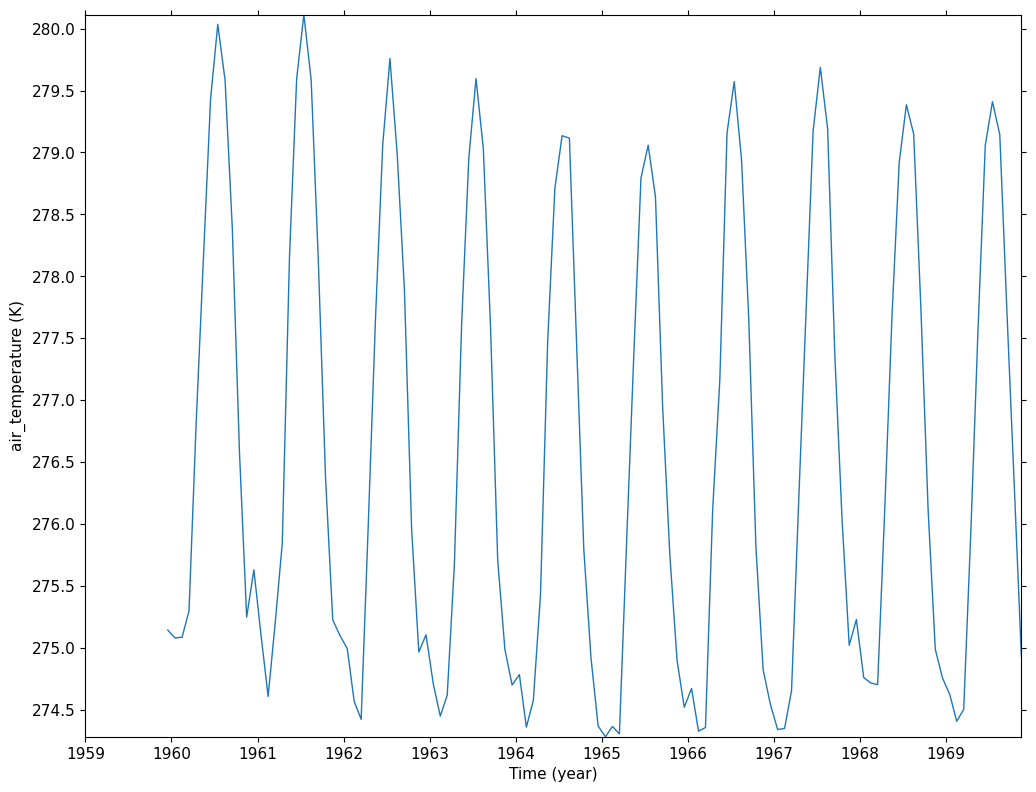

In [9]:
spatial_mean_monthly_field = monthly_field.collapse("area: mean")
print(spatial_mean_monthly_field)

cfp.lineplot(spatial_mean_monthly_field)

### c) Calculating seasonal trends

This data looks like it has trends on different time scales e.g. due to seasons. Let's pick some of those out using cf-python. We select two of the four seasons, using the `djf` and `jja` methods like so:

In [10]:
get_djf_season = cf.djf()  # specific collapse type for the months of December, January, February
get_jja_season = cf.jja()  # specific collapse type for the months of June, July, August

Then we collapse on these only using the `group` keyword argument to the `collapse` method, which we call a 'grouped collapse':

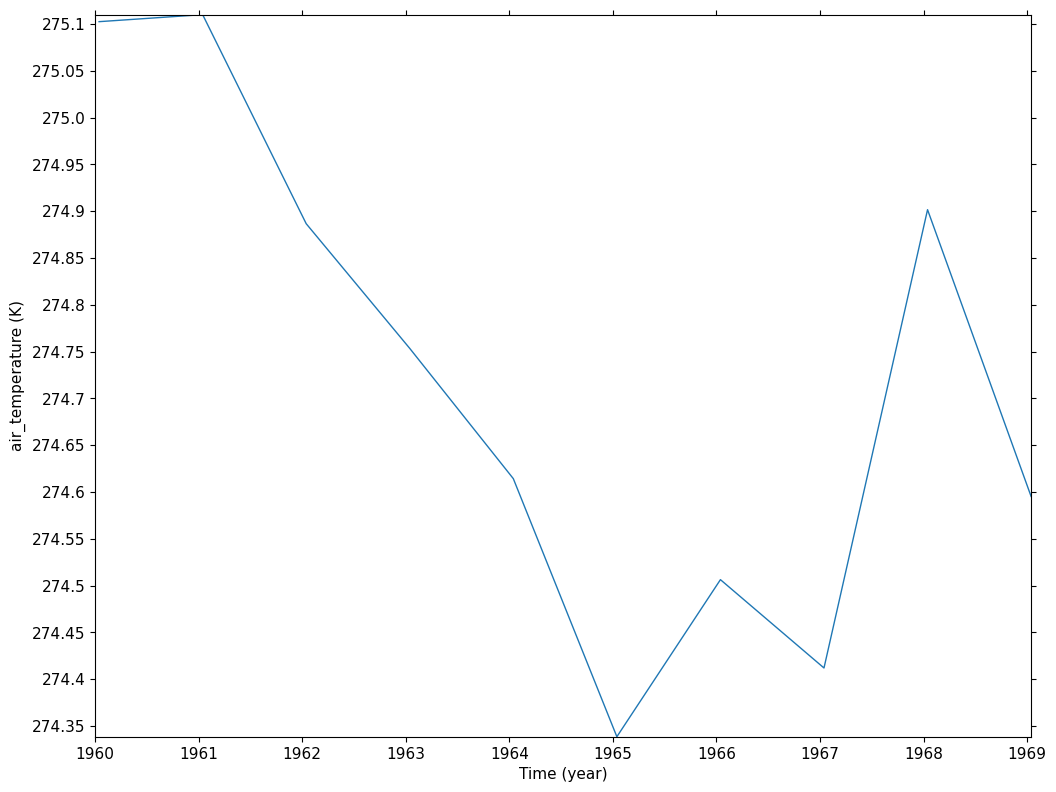

In [11]:
djf_season_mean = spatial_mean_monthly_field.collapse("T: mean", group=get_djf_season)  # mean across DJF season
cfp.lineplot(djf_season_mean)

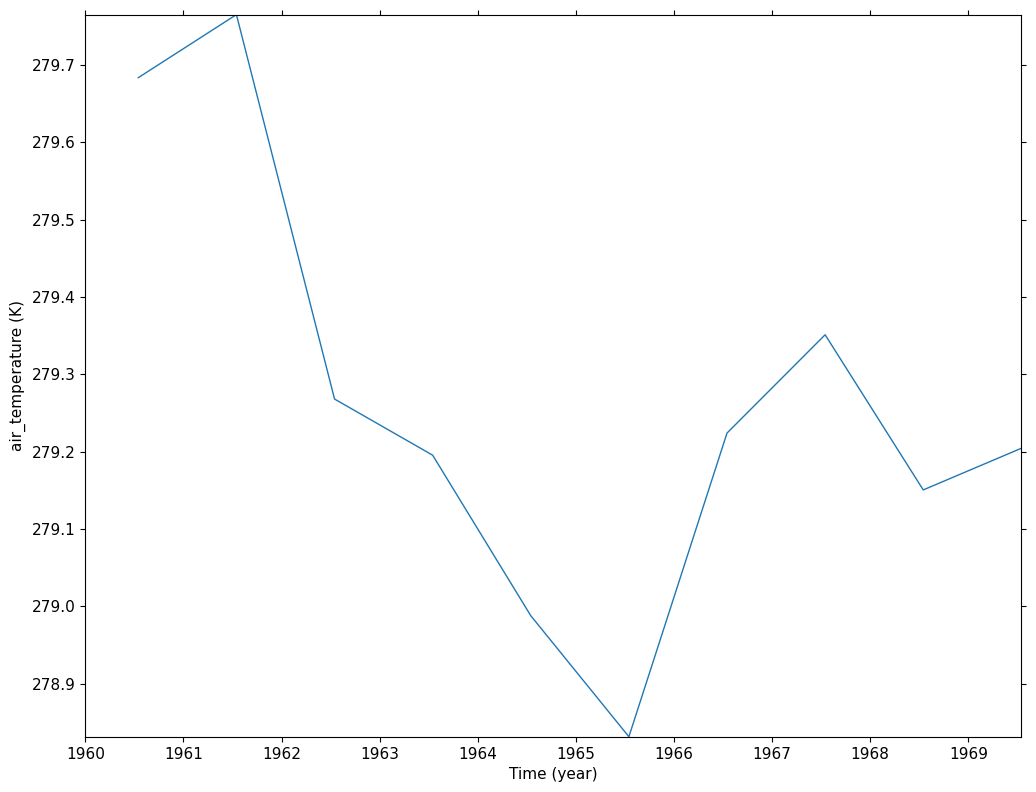

In [12]:
jja_season_mean = spatial_mean_monthly_field.collapse("T: mean", group=get_jja_season)  # mean across JJA season
cfp.lineplot(jja_season_mean)

### d) Plotting the seasonal trends on one (line)plot

To put those seasonal averages into context from the original data, it would be nice to plot them on top of the original line plot. We can do that using cf-plot, as an example of some more advanced cf-plot plotting capability. If you want to plot multiple aspects on one plot in this way, wrap the calls to the functions to plot such as `con` or `vect` or `lineplot` with the opening and closing functions `gopen` and `gclose`, like so:

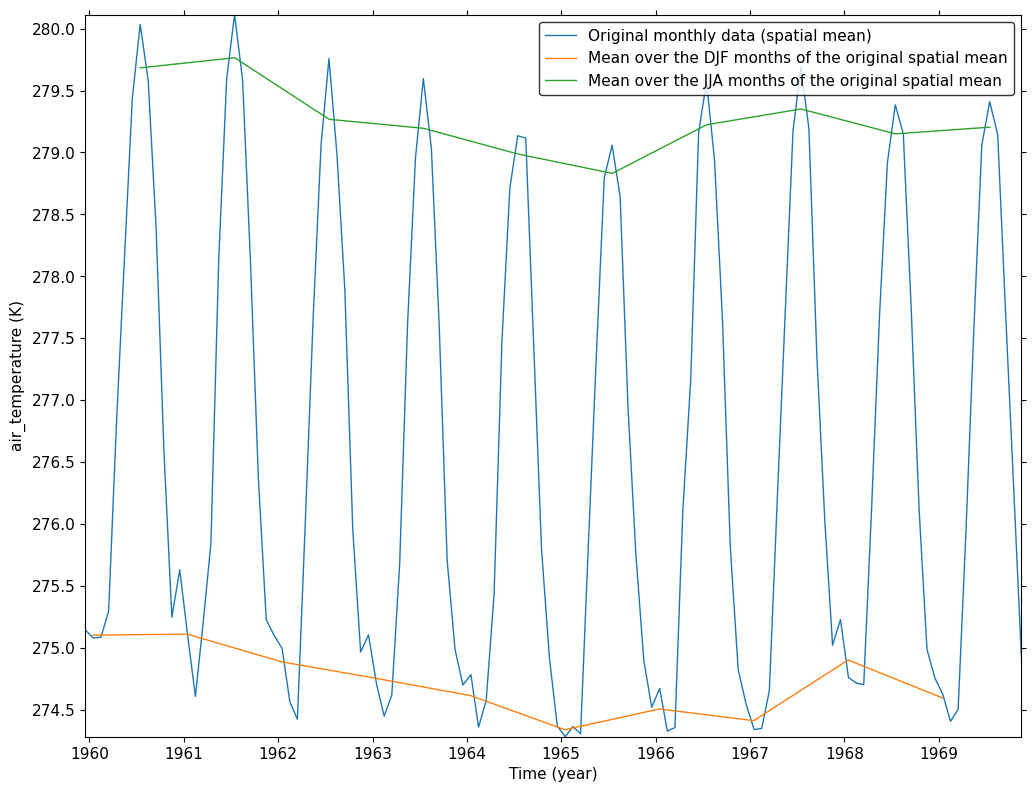

In [13]:
cfp.gopen()
# By adding the 'label' argument, we allow labels for the corresponding line on the plot legend
cfp.lineplot(spatial_mean_monthly_field, label="Original monthly data (spatial mean)")
cfp.lineplot(djf_season_mean, label="Mean over the DJF months of the original spatial mean")
cfp.lineplot(jja_season_mean, label="Mean over the JJA months of the original spatial mean")
cfp.gclose()

***